Multiple models that predict the car selling prices in rupee

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [15]:
#reading dataset
dfml = pd.read_csv('cardetailsv3.csv', sep=',')
dfshow = pd.read_csv('cardetailsv3.csv', sep=',')

In [16]:
dfml

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


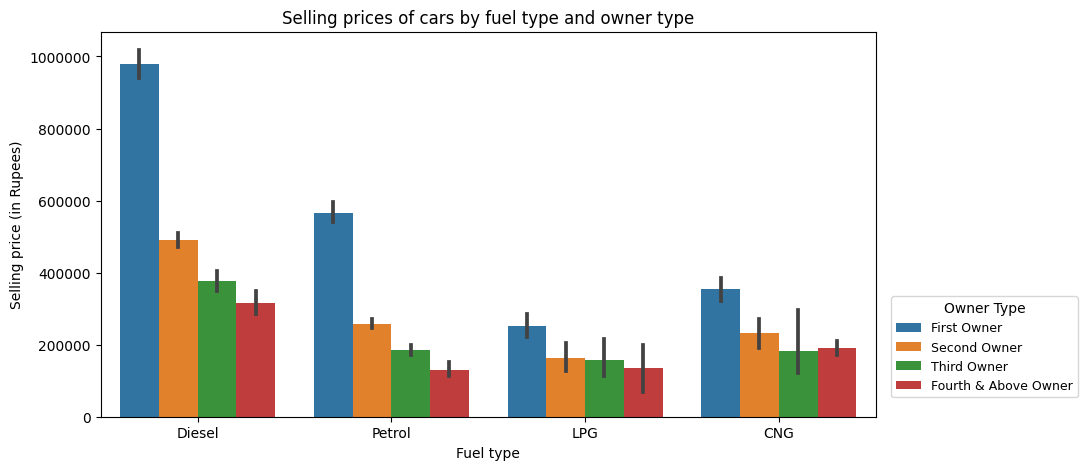

In [17]:
plt.figure(figsize=(10,5),dpi=100)
plt.ticklabel_format(style = 'plain')

fig = sns.barplot(x='fuel', y='selling_price', hue = dfshow[dfshow.owner != "Test Drive Car"]["owner"], data= dfshow[dfshow.owner != "Test Drive Car"])
fig.set_title("Selling prices of cars by fuel type and owner type")
fig.set_ylabel("Selling price (in Rupees)")
fig.set_xlabel("Fuel type")
fig.legend(title="Owner Type", loc=(1.02,0.05), fontsize=9)

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(dfml.corr(),annot=True,cmap='viridis',linewidths=.5)

In [19]:
#splitting name column into two columns named brand and model
pattern = r'([A-Z0-9._%+-]+) ([A-Z0-9._%+-]+)'

name = dfml['name'].str.findall(pattern, flags = re.IGNORECASE).str[0]

brand = name.str.get(0)
model = name.str.get(1)

dfml.insert(1, 'model', model)
dfml.insert(1, 'brand', brand)

dfml = dfml.drop(['name'], axis=1)
dfml = dfml.drop(['torque'], axis=1)

In [20]:
#converting engine column to float
pattern2 = r'([A-Z0-9._%+-]+) ([A-Z0-9._%+-]+)'

engineCc = dfml['engine'].str.findall(pattern, flags = re.IGNORECASE).str[0]

engineInCc = engineCc.str.get(0)

dfml['engine'] = engineInCc.astype(float)
dfml.rename(columns = {'engine':'engine_cc'}, inplace = True)

In [21]:
#converting max_power column to float

engineCc = dfml['max_power'].str.findall(pattern, flags = re.IGNORECASE).str[0]

engineInCc = engineCc.str.get(0)

dfml['max_power'] = engineInCc.astype(float)
dfml.rename(columns = {'max_power':'max_power_bhp'}, inplace = True)

In [22]:
#converting mileage column to float

engineCc = dfml['mileage'].str.findall(pattern, flags = re.IGNORECASE).str[0]

engineInCc = engineCc.str.get(0)

dfml['mileage'] = engineInCc.astype(float)
dfml.rename(columns = {'mileage':'mileage_kmpl'}, inplace = True)

In [23]:
y = dfml['selling_price']
X = dfml.drop(['selling_price'], axis=1)

In [24]:
X

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats
0,Maruti,Swift,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,Rapid,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,City,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,i20,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,Swift,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai,Verna,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti,Swift,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata,Indigo,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [25]:
num_cols = ['year', 'km_driven', 'mileage_kmpl', 'engine_cc', 'max_power_bhp', 'seats']

cat_cols = ['brand', 'model', 'fuel', 'seller_type', 'transmission', 'owner']

In [26]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [27]:
col_tr = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

X = col_tr.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Primitive Linear Regression

In [29]:
model = LinearRegression()
%time model.fit(X_train, y_train)
y_pred = model.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 57.8 ms


In [30]:
model.score(X_test, y_test)

0.9320162395298985


In [45]:
model.score(X_train, y_train)

0.9546735035678198

## RandomForestRegressor

In [31]:
model2 = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

In [32]:
%time model2.fit(X_train, y_train)

CPU times: total: 1min 25s
Wall time: 11.9 s


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [33]:
pred = model2.predict(X_test)

In [44]:
model2.score(X_test, y_test)

0.9720824749373221

In [43]:
model2.score(X_train, y_train)

0.9954245258804845

## GradientBoostingRegressor

In [35]:
#GradientBoostingRegressor
model3 = GradientBoostingRegressor(random_state=42)
%time model3.fit(X_train, y_train)
GradientBoostingRegressor(random_state=42)

CPU times: total: 812 ms
Wall time: 802 ms


GradientBoostingRegressor(random_state=42)

In [36]:
model3.score(X_test, y_test)

0.9599165469893418

In [42]:
model3.score(X_train, y_train)

0.9754764873988954

## RandomForestRegressor with Randomized Search

In [37]:
random_grid = {
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

model4 = RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_grid, n_iter=100, cv=3,
verbose=2, random_state=42, n_jobs=2)

In [ ]:
%time model4.fit(X_train, y_train)

In [39]:
model4.score(X_test, y_test)

0.9737852080886394

In [41]:
model4.score(X_train, y_train)

0.9947040584089404